In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [28]:
df = pd.read_csv('/Users/magnosouza/PycharmProjects/IntroducaoAnaliseDados/archive/synthetic_heart_disease_dataset.csv')
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [29]:
df['Alcohol_Intake'] = df['Alcohol_Intake'].fillna('Unknown')

In [30]:
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,Unknown,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,Unknown,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,Unknown,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [31]:
df.duplicated().any()

np.False_

In [43]:
df_gender = df.groupby('Gender')['Age'].count().reset_index().rename(columns={'Age':'total'}).sort_values(by=['total'], ascending=False)
df_gender['percentual'] = ((df_gender['total'] / df_gender['total'].sum()) * 100).round(2).astype(str) + '%'
df_gender

,Gender,total,percentual
0,Female,25110,50.22%
1,Male,24890,49.78%


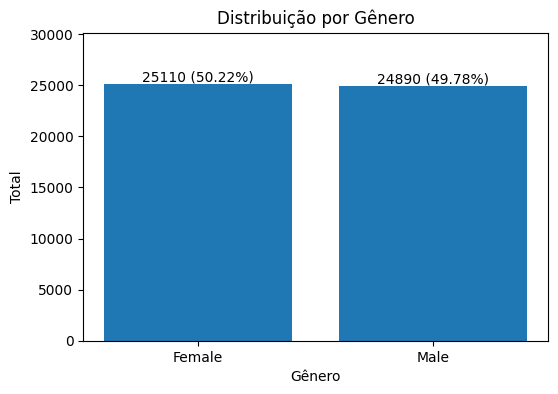

In [47]:
# Dados
labels = df_gender['Gender']
total = df_gender['total']
percent = df_gender['percentual']

plt.figure(figsize=(6,4))
bars = plt.bar(labels, total)

# Adicionando os labels (número e percentual)
for bar, pct, tot in zip(bars, percent, total):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{tot} ({pct})',
        ha='center', va='bottom'
    )

# Aumentando o eixo Y para não cortar os textos
plt.ylim(top=max(total) * 1.2)

plt.title('Distribuição por Gênero')
plt.ylabel('Total')
plt.xlabel('Gênero')

plt.show()


In [48]:
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,Unknown,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,Unknown,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,Unknown,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [67]:
df_alvo = df.groupby(['Gender', 'Heart_Disease'])['Age'].count().reset_index().rename(columns={'Age':'total'}).sort_values(by='total', ascending=False)
df_alvo_filtro = df_alvo[df_alvo['Heart_Disease'] > 0]

df_alvo_filtro['percentual'] = ((df_alvo_filtro['total'] / df_alvo_filtro['total'].sum() * 100).round(2).astype(str) + '%')

df_alvo_filtro

/var/folders/_j/41dnjqf95fz1w6cl1myszw840000gn/T/ipykernel_44523/4277926202.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Heart_Disease,total,percentual
1,Female,1,11590,50.02%
3,Male,1,11583,49.98%


In [59]:
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease,percentual
0,48,Male,78,157,26.4,Never,Unknown,Sedentary,Healthy,Medium,...,1,1,0,104,99,71,165,200,0,27.04%
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,1,1,0,111,72,60,145,206,0,23.18%
2,79,Female,88,152,32.3,Never,Unknown,Moderate,Average,Medium,...,0,1,0,116,102,78,148,208,0,26.61%
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,1,0,0,171,92,109,105,290,1,23.17%
4,34,Female,65,191,18.5,Current,Unknown,Sedentary,Healthy,Low,...,0,0,0,164,67,108,116,220,1,NaN


In [61]:
df = df.drop(columns='percentual')
df.head()


,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,Unknown,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,Unknown,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,Unknown,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [66]:
df_stress = df.groupby('Stress_Level')['Age'].count().reset_index().rename(columns={'Age':'total'}).sort_values(by='total', ascending=False)

df_stress['percentual'] = ((df_stress['total'] / df_stress['total'].sum()* 100).round(2).astype(str) + '%')

df_stress

,Stress_Level,total,percentual
2,Medium,20133,40.27%
1,Low,19941,39.88%
0,High,9926,19.85%


In [68]:
df_atividade = df.groupby('Physical_Activity')['Age'].count().reset_index().rename(columns={'Age': 'total'}).sort_values(by='total', ascending=False)

df_atividade['percentual'] = (
    df_atividade['total'] / df_atividade['total'].sum() * 100
).round(2).astype(str) + '%'

df_atividade

,Physical_Activity,total,percentual
1,Moderate,24976,49.95%
2,Sedentary,15077,30.15%
0,Active,9947,19.89%


In [69]:
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,Unknown,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,Unknown,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,Unknown,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [70]:
df_diet = df.groupby('Diet')['Age'].count().reset_index().rename(columns={'Age':'total'}).sort_values(by='total', ascending=False)

df_diet['percentual'] = (
    (df_diet['total'] / df_diet['total'].sum() * 100).round(2).astype(str) + '%')

df_diet

,Diet,total,percentual
0,Average,25169,50.34%
1,Healthy,14975,29.95%
2,Unhealthy,9856,19.71%
